In [53]:
# Import necessary packages
import requests
import urllib.request
import time
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
from urllib.request import urlopen
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [54]:
#Function that will scrape a wikipedia page with a list of movies by year, add the year as a new column and return 
# a data frame.

def get_table_after_1996(year):
    #create the url 
    url = 'http://en.wikipedia.org/wiki/List_of_American_films_of_'+ str(year)
    html = urlopen(url) 
    soup = BeautifulSoup(html, 'html.parser')
    website_url = requests.get(url).text 
    soup = BeautifulSoup(website_url, 'lxml')
    My_table = soup.find('table',{'class':'wikitable sortable'})
    titles = []
    directors = []
    actors = []
    genres = []
    rows = My_table.find_all('tr')
    for row in rows:
        cells = row.find_all('td')
        if len(cells)>=1:
            title = cells[0]
            titles.append(title.text)
            director = cells[1]
            directors.append(director.text)
            actor = cells[2]
            actors.append(actor.text)
            genre = cells[3]
            genres.append(genre.text)
            index = [*range(1,len(titles)+1,1)]
            df = pd.DataFrame({'Titles': titles,'Directors' : directors, 'Actors': actors, 'Genres': genres, }, index = index   )
            years = [year]*len(df)
            df['Year'] = years
    
    
    
    
    
    
    
    
    return df


In [55]:
df = get_table_after_1996(1999)
df.head()

,Titles,Directors,Actors,Genres,Year
1,10 Things I Hate About You,Gil Junger,"Julia Stiles, Heath Ledger, Larisa Oleynik, Jo...",Romantic comedy,1999
2,The 13th Warrior,John McTiernan,"Antonio Banderas, Diane Venora, Vladimir Kulic...",Action,1999
3,200 Cigarettes,Risa Bramon Garcia,"Ben Affleck, Casey Affleck, Dave Chappelle, Gu...","Comedy, Drama",1999
4,The 4th Floor,Josh Klausner,"Juliette Lewis, William Hurt, Shelley Duvall",Horror,1999
5,8mm,Joel Schumacher,"Nicolas Cage, Joaquin Phoenix, James Gandolfin...",Thriller,1999


In [56]:
#
df_1999 = get_table_after_1996(1999)
#create a list with all the movie genres
list_of_genres = ['children', 'fantasy', 'magical', 'mystery', 'action', 'crime', 'drama', 'science fiction', 'adventure', 'biography', 'comedy', 'thriller', 'musical', 'western', 'romance', 'animation', 'war', 'horror', 'sport', 'political', 'saga', ' satire', 'social']
len(list_of_genres)
#create a dictionary that will give war grades by genre


23

In [57]:
war_grades = {'children':1, 'fantasy':3, 'magical':3, 'mystery':4, 'action':7, 'crime':8, 'drama':7, 'SF':5, 'adventure': 4, 'biography':5, 'comedy':4, 'thriller':4, 'musical':4, 'western':8, 'romance': 2, 'war':10, 'horror':4, 'sport':3, 'political':6, 'saga':3, 'satire':2, 'social':4, 'animation':2}
len(war_grades)
war_grades_df = pd.DataFrame(war_grades.items(), columns=['Genres', 'Grade'])
war_grades_df.set_index('Genres')

,Grade
Genres,
children,1
fantasy,3
magical,3
mystery,4
action,7
crime,8
drama,7
SF,5
adventure,4


In [58]:
#create a list with all the genres from the "Genres" column and lower the case of each element
list_1999 = df['Genres'].to_list()
list_1999
lower_list = [x.lower() for x in list_1999]



In [59]:
#separate the genres where a movie has two or more genres
list = [x.split() for x in lower_list]
list_year = []
for sublist in list:
    for item in sublist:
        list_year.append(item)   


In [60]:
#some genres have comma attached, take off comma
list_year_no_comma = []
for item in list_year:
    if ',' in item:
        list_year_no_comma.append(item[:-1])
    else:
        list_year_no_comma.append(item)
print(list_year_no_comma)

['romantic', 'comedy', 'action', 'comedy', 'drama', 'horror', 'thriller', "children's", 'film', 'drama', 'documentary', 'comedy', 'comedy', 'action', 'comedy', 'family', 'animation', 'drama', 'musical', 'drama', 'sports', 'drama', 'thriller', 'science', 'fiction', 'romance', 'action', 'action', 'comedy', 'family', 'romantic', 'comedy', 'horror', 'comedy', 'drama', 'fantasy', 'crime', 'romantic', 'comedy', 'documentary', 'science', 'fiction', 'comedy', 'drama', 'crime', 'horror', 'romantic', 'comedy', 'comedy', 'crime', 'crime', 'action', 'comedy', 'drama', 'comedy', 'thriller', 'drama', 'comedy', 'action', 'comedy', 'comedy', 'drama', 'drama', 'romantic', 'comedy', 'action', 'drama', 'drama', 'thriller', 'drama', 'horror', 'drama', 'thriller', 'comedy', 'comedy', 'comedy', 'mockumentary', 'family', 'comedy', 'thriller', 'mockumentary', 'comedy', 'comedy', 'comedy', 'horror', 'crime', 'drama', 'biopic', 'science', 'fiction', 'thriller', 'thriller', 'drama', 'family', 'animated', 'thrill

In [61]:
# Create a dictionary
word_counts = {}
# Iterate through genre list
for genre in list_year_no_comma:
    # Update word counts - keep only genres in the general list of genres
    if genre in list_of_genres:
        word_counts[genre] = word_counts.get(genre, 0) + 1 #Get previous entry, update by 1
    else:
        continue

In [62]:
print(word_counts)
len(word_counts)

{'comedy': 74, 'action': 16, 'drama': 64, 'horror': 19, 'thriller': 15, 'animation': 7, 'musical': 2, 'romance': 3, 'fantasy': 1, 'crime': 14, 'war': 2, 'biography': 1}


12

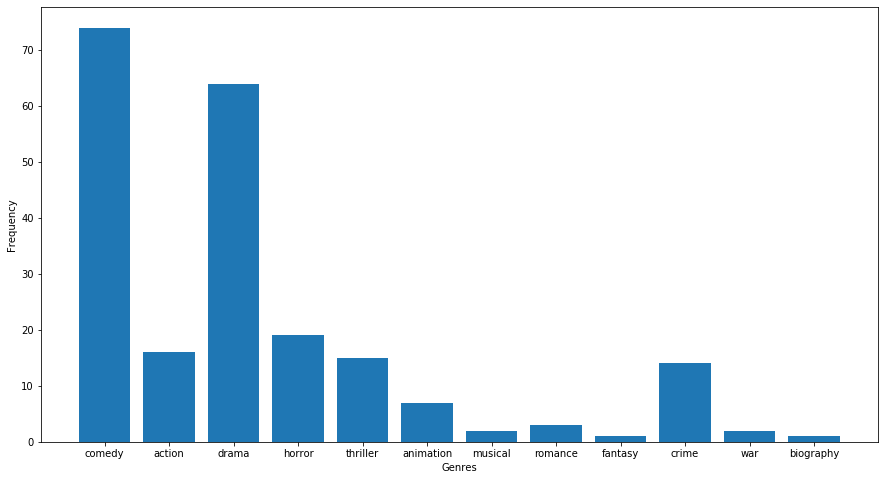

In [63]:
#plot dictionary
y_values_all=[]
x_values_all=[]
for k,v in word_counts.items():
    y_values_all.append(v)
    x_values_all.append(k)
plt.figure(figsize=(15,8))    
plt.bar(x_values_all, y_values_all, label="1999")
plt.xlabel("Genres")
plt.ylabel("Frequency")
plt.show()

In [64]:
#turn dictionary into df
df_to_plot = pd.DataFrame(word_counts.items(), columns=['Genres', 'year_1999'])
df_to_plot.set_index('Genres')

,year_1999
Genres,
comedy,74
action,16
drama,64
horror,19
thriller,15
animation,7
musical,2
romance,3
fantasy,1


In [65]:
Zeitgeist_df1 = war_grades_df.join(df_to_plot.set_index('Genres'), on='Genres')
Zeitgeist_df1 = Zeitgeist_df1.fillna(5)
Zeitgeist_df1

,Genres,Grade,year_1999
0,children,1,5.0
1,fantasy,3,1.0
2,magical,3,5.0
3,mystery,4,5.0
4,action,7,16.0
5,crime,8,14.0
6,drama,7,64.0
7,SF,5,5.0
8,adventure,4,5.0
9,biography,5,1.0


In [66]:
Zeitgeist_df1['1999_war_grade'] = Zeitgeist_df1['Grade']*Zeitgeist_df1['year_1999']

In [67]:
Zeitgeist_df1

,Genres,Grade,year_1999,1999_war_grade
0,children,1,5.0,5.0
1,fantasy,3,1.0,3.0
2,magical,3,5.0,15.0
3,mystery,4,5.0,20.0
4,action,7,16.0,112.0
5,crime,8,14.0,112.0
6,drama,7,64.0,448.0
7,SF,5,5.0,25.0
8,adventure,4,5.0,20.0
9,biography,5,1.0,5.0


In [69]:
year = 1999
years_final = [year]*len(Zeitgeist_df1)
Zeitgeist_df1['Year'] = years_final

In [70]:
Zeitgeist_df1

,Genres,Grade,year_1999,1999_war_grade,Year
0,children,1,5.0,5.0,1999
1,fantasy,3,1.0,3.0,1999
2,magical,3,5.0,15.0,1999
3,mystery,4,5.0,20.0,1999
4,action,7,16.0,112.0,1999
5,crime,8,14.0,112.0,1999
6,drama,7,64.0,448.0,1999
7,SF,5,5.0,25.0,1999
8,adventure,4,5.0,20.0,1999
9,biography,5,1.0,5.0,1999
